### **Importing the required libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from xgboost import XGBRegressor
import shap
from warnings import filterwarnings
filterwarnings('ignore')

### **Reading the Data file**

In [4]:
df = pd.read_csv('/content/mw_pw_profiles.csv',low_memory=False)
df.head()

,Unnamed: 0,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,...,key_pulse,key_pulse_2,full_name,batting_style,bowling_style,playing_role,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,0,00015688,1158348,female,6,2018-08-21,Botswana Cricket Association Women's T20I Series,T20,M King,10,...,NaN,NaN,NaN,NaN,NaN,NaN,[],5,8,17
1,1,00015688,1182644,female,6,2019-05-05,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,8,...,NaN,NaN,NaN,NaN,NaN,NaN,[],3,0,7
2,2,00015688,1275107,female,6,2021-09-09,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],1,0,5
3,3,00015688,1275113,female,6,2021-09-15,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],0,0,4
4,4,00015688,1275125,female,6,2021-09-14,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],-5,0,-1


In [5]:
df.columns

Index(['Unnamed: 0', 'player_id', 'match_id', 'gender', 'balls_per_over',
       'start_date', 'series_name', 'match_type', 'name_x', 'runs_scored',
       'player_out', 'balls_faced', 'fours_scored', 'sixes_scored',
       'catches_taken', 'run_out_direct', 'run_out_throw', 'stumpings_done',
       'out_kind', 'dot_balls_as_batsman', 'order_seen', 'balls_bowled',
       'runs_conceded', 'wickets_taken', 'bowled_done', 'lbw_done', 'maidens',
       'dot_balls_as_bowler', 'player_team', 'opposition_team', 'name_y',
       'unique_name', 'key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz',
       'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2',
       'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive',
       'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay',
       'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2',
       'full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams',
       'fantasy_score_batting', 'fantasy_sc

### **Removing unnecessary columns**

In [6]:
df.drop(['Unnamed: 0','gender', 'balls_per_over', 'series_name', 'name_x', 'name_y', 'unique_name','key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz',
       'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2',
       'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive',
       'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay',
       'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2',
       'full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams', ], axis = 1, inplace = True)
df.columns

Index(['player_id', 'match_id', 'start_date', 'match_type', 'runs_scored',
       'player_out', 'balls_faced', 'fours_scored', 'sixes_scored',
       'catches_taken', 'run_out_direct', 'run_out_throw', 'stumpings_done',
       'out_kind', 'dot_balls_as_batsman', 'order_seen', 'balls_bowled',
       'runs_conceded', 'wickets_taken', 'bowled_done', 'lbw_done', 'maidens',
       'dot_balls_as_bowler', 'player_team', 'opposition_team',
       'fantasy_score_batting', 'fantasy_score_bowling',
       'fantasy_score_total'],
      dtype='object')

### **Preprocessing**

In [7]:
df.isnull().sum()

,0
player_id,0
match_id,0
start_date,0
match_type,0
runs_scored,0
player_out,0
balls_faced,0
fours_scored,0
sixes_scored,0
catches_taken,0


### **Sorting according to the start date**

In [8]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df.sort_values(by=['start_date'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,player_id,match_id,start_date,match_type,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,catches_taken,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,f44af07f,63963,2001-12-19,Test,39,1,93,6,0,0,...,0,0,0,2,39,England,India,45,0,49
1,de8cce37,63963,2001-12-19,Test,12,1,18,2,0,1,...,0,0,0,0,0,India,England,14,8,26
2,b6cd714f,63963,2001-12-19,Test,4,1,16,0,0,0,...,4,0,1,5,96,India,England,4,76,84
3,725529bc,63963,2001-12-19,Test,0,1,3,0,0,0,...,0,0,0,3,70,India,England,-4,0,0
4,0184dc35,63963,2001-12-19,Test,3,1,61,0,0,1,...,0,0,0,0,0,India,England,3,14,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,4e38a3d6,1485778,2025-05-20,T20,4,1,10,0,0,0,...,0,0,0,0,0,Nepal,Thailand,-2,0,2
416708,bd36bc39,1485778,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,0,8,Thailand,Nepal,0,16,20
416709,f6ddfe08,1485778,2025-05-20,T20,0,0,0,0,0,1,...,0,0,0,0,10,Thailand,Nepal,0,12,16
416710,a2f46292,1473500,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,0,6,Chennai Super Kings,Rajasthan Royals,0,-4,0


### **Feature Generation (Separate Dataframe)**

**Preprocessing the categorical data**

In [9]:
df_features = df.copy()
lbenc = LabelEncoder()
df_features['player_id'] = lbenc.fit_transform(df_features['player_id'])
df_features = pd.get_dummies(df_features, columns = ['match_type'], drop_first = True, dtype = int)

**Generating some new features**

In [10]:
df_features['strike_rate'] = (df['runs_scored']/df['balls_faced'])*100
df_features['economy_rate'] = (df['runs_conceded']/df['balls_bowled'])*100
df_features['all_rounder']  = (df_features['runs_scored']/50 + df_features['wickets_taken']/5)*36

**Dropping some more values**

In [11]:
df_features.drop(['runs_conceded','balls_faced','balls_bowled','player_out','out_kind',
                  'dot_balls_as_batsman','dot_balls_as_bowler',
                  'fantasy_score_bowling','fantasy_score_batting'],inplace =True,axis =1)

In [12]:
df_features.columns

Index(['player_id', 'match_id', 'start_date', 'runs_scored', 'fours_scored',
       'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw',
       'stumpings_done', 'order_seen', 'wickets_taken', 'bowled_done',
       'lbw_done', 'maidens', 'player_team', 'opposition_team',
       'fantasy_score_total', 'match_type_MDM', 'match_type_ODI',
       'match_type_ODM', 'match_type_T20', 'match_type_Test', 'strike_rate',
       'economy_rate', 'all_rounder'],
      dtype='object')

###**Weighted Moving Average**
WMA (Weighted Moving Average) is a type of moving average that assigns more importance (weight) to recent data points when calculating the average. The weights are the hyperparameters here.

For a data series $ P = [P_1, P_2, ..., P_n]  $ and a window size of $ n $ :

$$
\text{WMA}_t = \frac{\sum_{i=1}^{n} w_i \cdot P_{t - n + i}}{\sum_{i=1}^{n} w_i}
$$

Where:
- $w_i $ are the weights (typically: $ w_i = i $)
- $P_{t - n + i} $ is the value $ i $ steps back from time $ t $

---

In [13]:
def wma(col,span): # Weighted Moving Average function
  weights = np.array([i ** math.e for i in range(1, span + 1)]) # Custom wieghts :)
  return col.rolling(span).apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)

sel_feat = [
    'runs_scored', 'fours_scored', 'sixes_scored', 'catches_taken',
    'run_out_direct', 'run_out_throw', 'stumpings_done', 'wickets_taken',
    'bowled_done', 'lbw_done', 'maidens', 'strike_rate', 'economy_rate','all_rounder'
]
span = [1,5,10]
for col in sel_feat:
  for n in span:
    col_name = f"{col}_{n}"
    df_features[col_name] = (
            df_features
            .groupby('player_id')[col]
            .transform(lambda x: wma(x.shift(1), n))
        )

In [14]:
df_features.shape
df_features.columns

Index(['player_id', 'match_id', 'start_date', 'runs_scored', 'fours_scored',
       'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw',
       'stumpings_done', 'order_seen', 'wickets_taken', 'bowled_done',
       'lbw_done', 'maidens', 'player_team', 'opposition_team',
       'fantasy_score_total', 'match_type_MDM', 'match_type_ODI',
       'match_type_ODM', 'match_type_T20', 'match_type_Test', 'strike_rate',
       'economy_rate', 'all_rounder', 'runs_scored_1', 'runs_scored_5',
       'runs_scored_10', 'fours_scored_1', 'fours_scored_5', 'fours_scored_10',
       'sixes_scored_1', 'sixes_scored_5', 'sixes_scored_10',
       'catches_taken_1', 'catches_taken_5', 'catches_taken_10',
       'run_out_direct_1', 'run_out_direct_5', 'run_out_direct_10',
       'run_out_throw_1', 'run_out_throw_5', 'run_out_throw_10',
       'stumpings_done_1', 'stumpings_done_5', 'stumpings_done_10',
       'wickets_taken_1', 'wickets_taken_5', 'wickets_taken_10',
       'bowled_done_1', '

In [15]:
df_features.drop(['runs_scored', 'fours_scored', 'sixes_scored', 'catches_taken',
    'run_out_direct', 'run_out_throw', 'stumpings_done', 'wickets_taken',
    'bowled_done', 'lbw_done', 'maidens','player_team','opposition_team', 'strike_rate', 'economy_rate','all_rounder'],inplace = True, axis = 1)
df_features.fillna(0, inplace=True)
df_features.sort_values(by=['start_date'], inplace=True)
df_features.reset_index(drop=True, inplace=True)

In [16]:
df_features.shape

(416712, 52)

In [17]:
df_features.columns

Index(['player_id', 'match_id', 'start_date', 'order_seen',
       'fantasy_score_total', 'match_type_MDM', 'match_type_ODI',
       'match_type_ODM', 'match_type_T20', 'match_type_Test', 'runs_scored_1',
       'runs_scored_5', 'runs_scored_10', 'fours_scored_1', 'fours_scored_5',
       'fours_scored_10', 'sixes_scored_1', 'sixes_scored_5',
       'sixes_scored_10', 'catches_taken_1', 'catches_taken_5',
       'catches_taken_10', 'run_out_direct_1', 'run_out_direct_5',
       'run_out_direct_10', 'run_out_throw_1', 'run_out_throw_5',
       'run_out_throw_10', 'stumpings_done_1', 'stumpings_done_5',
       'stumpings_done_10', 'wickets_taken_1', 'wickets_taken_5',
       'wickets_taken_10', 'bowled_done_1', 'bowled_done_5', 'bowled_done_10',
       'lbw_done_1', 'lbw_done_5', 'lbw_done_10', 'maidens_1', 'maidens_5',
       'maidens_10', 'strike_rate_1', 'strike_rate_5', 'strike_rate_10',
       'economy_rate_1', 'economy_rate_5', 'economy_rate_10', 'all_rounder_1',
       'all_rounde

###**Comparison between final feature generated Dataframe and Old Dataframe**

In [18]:
df

,player_id,match_id,start_date,match_type,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,catches_taken,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,f44af07f,63963,2001-12-19,Test,39,1,93,6,0,0,...,0,0,0,2,39,England,India,45,0,49
1,de8cce37,63963,2001-12-19,Test,12,1,18,2,0,1,...,0,0,0,0,0,India,England,14,8,26
2,b6cd714f,63963,2001-12-19,Test,4,1,16,0,0,0,...,4,0,1,5,96,India,England,4,76,84
3,725529bc,63963,2001-12-19,Test,0,1,3,0,0,0,...,0,0,0,3,70,India,England,-4,0,0
4,0184dc35,63963,2001-12-19,Test,3,1,61,0,0,1,...,0,0,0,0,0,India,England,3,14,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,4e38a3d6,1485778,2025-05-20,T20,4,1,10,0,0,0,...,0,0,0,0,0,Nepal,Thailand,-2,0,2
416708,bd36bc39,1485778,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,0,8,Thailand,Nepal,0,16,20
416709,f6ddfe08,1485778,2025-05-20,T20,0,0,0,0,0,1,...,0,0,0,0,10,Thailand,Nepal,0,12,16
416710,a2f46292,1473500,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,0,6,Chennai Super Kings,Rajasthan Royals,0,-4,0


In [19]:
df_features

,player_id,match_id,start_date,order_seen,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,...,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,all_rounder_1,all_rounder_5,all_rounder_10
0,11182,63963,2001-12-19,7,49,0,0,0,0,1,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,1878,63963,2001-12-19,0,44,0,0,0,0,1,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,10153,63963,2001-12-19,6,84,0,0,0,0,1,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
3,11344,63963,2001-12-19,3,62,0,0,0,0,1,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,10707,63963,2001-12-19,2,38,0,0,0,0,1,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,42,0,0,1,0,0,...,0.000000,57.692308,61.53258,61.002581,0.000000,0.000000,0.000000,10.80,11.065393,12.664247
416708,7111,1462374,2025-05-20,7,96,0,0,1,0,0,...,0.000000,100.000000,0.00000,0.000000,50.000000,64.365373,72.467429,16.56,27.788399,26.730006
416709,10032,1462374,2025-05-20,8,13,0,0,1,0,0,...,0.003919,18.181818,0.00000,0.000000,62.903226,83.450138,89.922170,15.84,18.496945,16.810381
416710,10220,1473500,2025-05-20,2,16,0,0,0,1,0,...,0.000000,0.000000,53.16368,69.593201,0.000000,0.000000,0.000000,0.00,9.602657,15.384954


### **Dividing the Datasets**

In [20]:
df_features['start_date'] = pd.to_datetime(df_features['start_date'], errors='coerce')
zipper = pd.to_datetime('2023-08-21')
df_train = df_features[df_features['start_date'] < zipper]
df_test = df_features[df_features['start_date'] >= zipper]

In [21]:
df_train

,player_id,match_id,start_date,order_seen,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,...,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,all_rounder_1,all_rounder_5,all_rounder_10
0,11182,63963,2001-12-19,7,49,0,0,0,0,1,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,1878,63963,2001-12-19,0,44,0,0,0,0,1,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,10153,63963,2001-12-19,6,84,0,0,0,0,1,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
3,11344,63963,2001-12-19,3,62,0,0,0,0,1,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,10707,63963,2001-12-19,2,38,0,0,0,0,1,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333487,9678,1377729,2023-08-20,0,56,0,0,0,1,0,...,0.077654,0.0,0.00000,0.000000,83.333333,87.407189,87.457135,14.40,9.708032,10.637781
333488,2628,1347553,2023-08-20,0,7,0,0,1,0,0,...,0.470207,110.0,0.00000,0.000000,83.720930,102.866370,123.540209,7.92,6.702697,6.682755
333489,7353,1347550,2023-08-20,0,122,0,0,1,0,0,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,2.753214,7.907165
333490,2981,1347550,2023-08-20,0,135,0,0,1,0,0,...,1.070431,150.0,105.76231,85.605678,25.000000,52.321656,58.677908,23.76,22.567788,22.708353


In [22]:
df_test

,player_id,match_id,start_date,order_seen,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,...,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,all_rounder_1,all_rounder_5,all_rounder_10
333492,6686,1355634,2023-08-21,0,8,0,0,0,1,0,...,0.000000,123.529412,116.994889,0.000000,120.000000,109.187488,121.870861,15.12,19.143310,19.371102
333493,6713,1355634,2023-08-21,2,9,0,0,0,1,0,...,0.000000,192.857143,118.950609,108.164526,0.000000,0.000000,0.000000,19.44,11.277770,9.976343
333494,11401,1393311,2023-08-21,4,85,0,0,0,1,0,...,0.000000,60.869565,67.175046,68.569397,0.000000,0.000000,0.000000,10.08,18.842858,20.188834
333495,391,1393311,2023-08-21,0,42,0,0,0,1,0,...,0.118072,85.714286,0.000000,0.000000,137.500000,114.287215,0.000000,18.72,13.866873,12.194887
333496,7481,1355634,2023-08-21,1,23,0,0,0,1,0,...,0.127305,100.000000,120.406118,120.895537,0.000000,0.000000,0.000000,5.76,14.034379,23.076988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,42,0,0,1,0,0,...,0.000000,57.692308,61.532580,61.002581,0.000000,0.000000,0.000000,10.80,11.065393,12.664247
416708,7111,1462374,2025-05-20,7,96,0,0,1,0,0,...,0.000000,100.000000,0.000000,0.000000,50.000000,64.365373,72.467429,16.56,27.788399,26.730006
416709,10032,1462374,2025-05-20,8,13,0,0,1,0,0,...,0.003919,18.181818,0.000000,0.000000,62.903226,83.450138,89.922170,15.84,18.496945,16.810381
416710,10220,1473500,2025-05-20,2,16,0,0,0,1,0,...,0.000000,0.000000,53.163680,69.593201,0.000000,0.000000,0.000000,0.00,9.602657,15.384954


In [23]:
X_train = df_train.drop(['fantasy_score_total', 'match_id', 'start_date'], axis = 1)
y_train = df_train['fantasy_score_total']

In [24]:
X_test = df_test.drop(['fantasy_score_total', 'match_id', 'start_date'], axis = 1)
y_test = df_test['fantasy_score_total']

In [25]:
X_train.shape

(333492, 49)

In [26]:
y_train.shape

(333492,)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333492 entries, 0 to 333491
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   player_id          333492 non-null  int64  
 1   order_seen         333492 non-null  int64  
 2   match_type_MDM     333492 non-null  int64  
 3   match_type_ODI     333492 non-null  int64  
 4   match_type_ODM     333492 non-null  int64  
 5   match_type_T20     333492 non-null  int64  
 6   match_type_Test    333492 non-null  int64  
 7   runs_scored_1      333492 non-null  float64
 8   runs_scored_5      333492 non-null  float64
 9   runs_scored_10     333492 non-null  float64
 10  fours_scored_1     333492 non-null  float64
 11  fours_scored_5     333492 non-null  float64
 12  fours_scored_10    333492 non-null  float64
 13  sixes_scored_1     333492 non-null  float64
 14  sixes_scored_5     333492 non-null  float64
 15  sixes_scored_10    333492 non-null  float64
 16  catches

### **XGBoost**

**Applying model**

In [28]:
xg = XGBRegressor(n_estimators=500, learning_rate=0.04, max_depth  = 5,random_state = 42)
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [29]:
predicted_fst = xg.predict(X_test)

In [30]:
print("RMSE:", mean_squared_error(y_test, predicted_fst))
print("R2 Score:", r2_score(y_test, predicted_fst))

RMSE: 1407.7275390625
R2 Score: 0.17793351411819458


In [31]:
df_test['predicted_fst'] = predicted_fst
df_test

,player_id,match_id,start_date,order_seen,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,...,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,all_rounder_1,all_rounder_5,all_rounder_10,predicted_fst
333492,6686,1355634,2023-08-21,0,8,0,0,0,1,0,...,123.529412,116.994889,0.000000,120.000000,109.187488,121.870861,15.12,19.143310,19.371102,48.403511
333493,6713,1355634,2023-08-21,2,9,0,0,0,1,0,...,192.857143,118.950609,108.164526,0.000000,0.000000,0.000000,19.44,11.277770,9.976343,40.682480
333494,11401,1393311,2023-08-21,4,85,0,0,0,1,0,...,60.869565,67.175046,68.569397,0.000000,0.000000,0.000000,10.08,18.842858,20.188834,35.020252
333495,391,1393311,2023-08-21,0,42,0,0,0,1,0,...,85.714286,0.000000,0.000000,137.500000,114.287215,0.000000,18.72,13.866873,12.194887,40.423618
333496,7481,1355634,2023-08-21,1,23,0,0,0,1,0,...,100.000000,120.406118,120.895537,0.000000,0.000000,0.000000,5.76,14.034379,23.076988,46.790001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,42,0,0,1,0,0,...,57.692308,61.532580,61.002581,0.000000,0.000000,0.000000,10.80,11.065393,12.664247,39.242279
416708,7111,1462374,2025-05-20,7,96,0,0,1,0,0,...,100.000000,0.000000,0.000000,50.000000,64.365373,72.467429,16.56,27.788399,26.730006,56.343697
416709,10032,1462374,2025-05-20,8,13,0,0,1,0,0,...,18.181818,0.000000,0.000000,62.903226,83.450138,89.922170,15.84,18.496945,16.810381,54.233967
416710,10220,1473500,2025-05-20,2,16,0,0,0,1,0,...,0.000000,53.163680,69.593201,0.000000,0.000000,0.000000,0.00,9.602657,15.384954,43.072468


**Performance Analysis**

In [32]:
eval_df = (
    df_test.groupby('match_id').apply(
        lambda x : pd.Series({
            'sum_top11_actual' : x['fantasy_score_total'].nlargest(11).sum(),
            'sum_top11_predict' : x['predicted_fst'].nlargest(11).sum()
        })
    ).reset_index()
)
eval_df

,match_id,sum_top11_actual,sum_top11_predict
0,1336048,643.0,504.047089
1,1336049,745.0,479.846832
2,1336050,772.0,478.077698
3,1336051,697.0,464.495087
4,1336052,891.0,575.985168
...,...,...,...
3755,1484052,762.0,465.103394
3756,1485778,649.0,444.534943
3757,1486225,846.0,437.153320
3758,1486227,688.0,473.583405


In [33]:
eval_df['abs_%_error'] = (
    (eval_df['sum_top11_predict'] - eval_df['sum_top11_actual']).abs() /
    eval_df['sum_top11_actual']
) * 100
eval_df['_%_error'] = (
    (eval_df['sum_top11_predict'] - eval_df['sum_top11_actual']) /
    eval_df['sum_top11_actual']
) * 100
mean_abs_percentage_error = eval_df['abs_%_error'].mean()
mean_percentage_error = eval_df['_%_error'].mean()
print(f"Mean Absolute % Error: {mean_abs_percentage_error:.2f}")
print(f"Mean % Error: {mean_percentage_error:.2f}")

Mean Absolute % Error: 31.99
Mean % Error: -25.04


In [34]:
eval_df

,match_id,sum_top11_actual,sum_top11_predict,abs_%_error,_%_error
0,1336048,643.0,504.047089,21.610095,-21.610095
1,1336049,745.0,479.846832,35.591029,-35.591029
2,1336050,772.0,478.077698,38.072837,-38.072837
3,1336051,697.0,464.495087,33.357950,-33.357950
4,1336052,891.0,575.985168,35.355200,-35.355200
...,...,...,...,...,...
3755,1484052,762.0,465.103394,38.962809,-38.962809
3756,1485778,649.0,444.534943,31.504631,-31.504631
3757,1486225,846.0,437.153320,48.327031,-48.327031
3758,1486227,688.0,473.583405,31.165203,-31.165203


**Plot between actual v/s predicted fantasy scores**

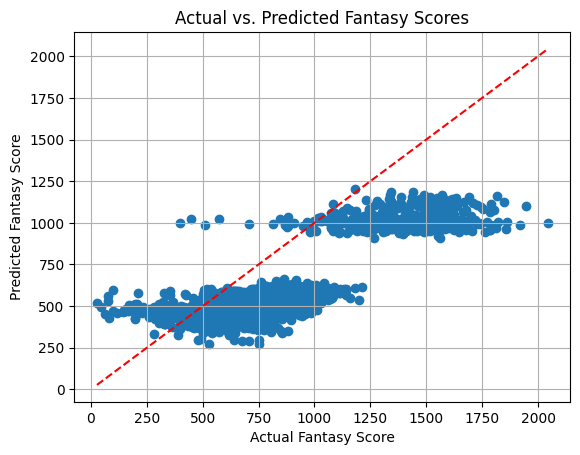

In [35]:
plt.scatter(eval_df['sum_top11_actual'], eval_df['sum_top11_predict'])
plt.plot([eval_df['sum_top11_actual'].min(),eval_df['sum_top11_actual'].max()],[eval_df['sum_top11_actual'].min(),eval_df['sum_top11_actual'].max()],'r--')
plt.xlabel('Actual Fantasy Score')
plt.ylabel('Predicted Fantasy Score')
plt.title('Actual vs. Predicted Fantasy Scores')
plt.grid()
plt.show()

**Validation with SHAP values**

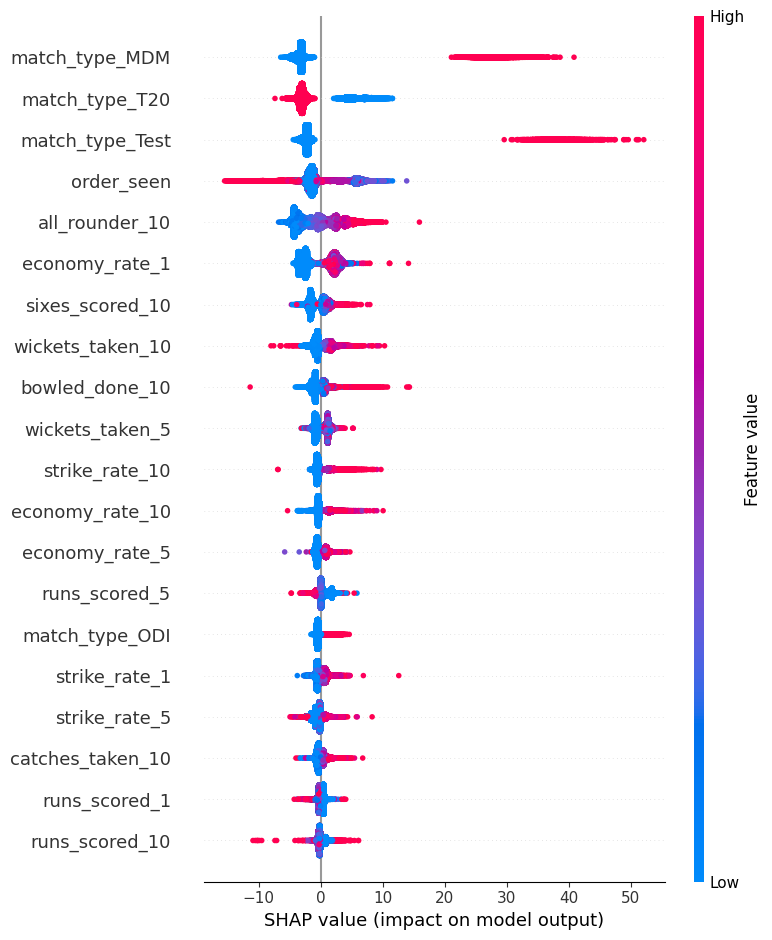

In [36]:
explainer = shap.TreeExplainer(xg)
explain = explainer(X_test)
extent= explainer.shap_values(X_test)
shap.summary_plot(extent, X_test) #Summary Plot

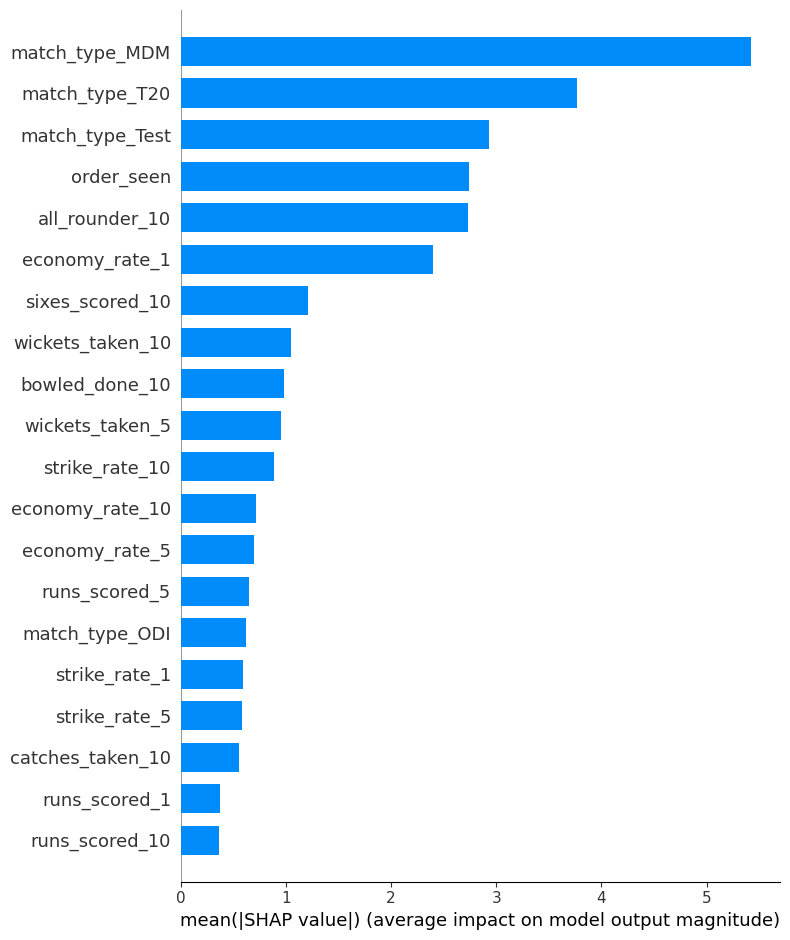

In [37]:
shap.summary_plot(extent,X_test,plot_type='bar') # Mean absolute SHAP values plot

## **Recursive Feature Elimination (with RFECV)**

In [38]:
std = StandardScaler() #Scaling
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [39]:
xg2 = XGBRegressor(n_estimators=500, learning_rate=0.04, max_depth  = 5,random_state = 42)
rfecv = RFECV(estimator=xg2, step=1, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
rfecv.fit(X_train_scaled, y_train)

RFECV(cv=5,
      estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                             colsample_bylevel=None, colsample_bynode=None,
                             colsample_bytree=None, device=None,
                             early_stopping_rounds=None,
                             enable_categorical=False, eval_metric=None,
                             feature_types=None, gamma=None, grow_policy=None,
                             importance_type=None, interaction_constraints=None,
                             learning_rate=0.04, max_bin=None,
                             max_cat_threshold=None, max_cat_to_onehot=None,
                             max_delta_step=None, max_depth=5, max_leaves=None,
                             min_child_weight=None, missing=nan,
                             monotone_constraints=None, multi_strategy=None,
                             n_estimators=500, n_jobs=None,
                             num_parallel_tree=None, random_state=42, ...),
      n_jobs=-1, scoring='neg_mean_squared_error')

In [40]:
print(f"Number of optimal features: {rfecv.n_features_}")
print("Selected features:", X_train.columns[rfecv.support_].tolist())

Number of optimal features: 44
Selected features: ['player_id', 'order_seen', 'match_type_MDM', 'match_type_ODI', 'match_type_ODM', 'match_type_T20', 'match_type_Test', 'runs_scored_1', 'runs_scored_5', 'runs_scored_10', 'fours_scored_1', 'fours_scored_5', 'fours_scored_10', 'sixes_scored_1', 'sixes_scored_5', 'sixes_scored_10', 'catches_taken_1', 'catches_taken_5', 'catches_taken_10', 'run_out_direct_5', 'run_out_direct_10', 'run_out_throw_10', 'stumpings_done_10', 'wickets_taken_1', 'wickets_taken_5', 'wickets_taken_10', 'bowled_done_1', 'bowled_done_5', 'bowled_done_10', 'lbw_done_1', 'lbw_done_5', 'lbw_done_10', 'maidens_1', 'maidens_5', 'maidens_10', 'strike_rate_1', 'strike_rate_5', 'strike_rate_10', 'economy_rate_1', 'economy_rate_5', 'economy_rate_10', 'all_rounder_1', 'all_rounder_5', 'all_rounder_10']


In [41]:
X_train_sel = rfecv.transform(X_train_scaled)
X_test_sel = rfecv.transform(X_test_scaled)
xg2.fit(X_train_sel, y_train)
predicted_fst_2 = xg2.predict(X_test_sel)
print("RMSE :",mean_squared_error(y_test, predicted_fst_2))
print("R2 Score:", r2_score(y_test, predicted_fst_2))

RMSE : 1407.97705078125
R2 Score: 0.17778784036636353


**Performance Analysis**

In [42]:
df_test['predicted_fst_2'] = predicted_fst_2
df_test

,player_id,match_id,start_date,order_seen,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,...,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,all_rounder_1,all_rounder_5,all_rounder_10,predicted_fst,predicted_fst_2
333492,6686,1355634,2023-08-21,0,8,0,0,0,1,0,...,116.994889,0.000000,120.000000,109.187488,121.870861,15.12,19.143310,19.371102,48.403511,48.071754
333493,6713,1355634,2023-08-21,2,9,0,0,0,1,0,...,118.950609,108.164526,0.000000,0.000000,0.000000,19.44,11.277770,9.976343,40.682480,40.435200
333494,11401,1393311,2023-08-21,4,85,0,0,0,1,0,...,67.175046,68.569397,0.000000,0.000000,0.000000,10.08,18.842858,20.188834,35.020252,34.706684
333495,391,1393311,2023-08-21,0,42,0,0,0,1,0,...,0.000000,0.000000,137.500000,114.287215,0.000000,18.72,13.866873,12.194887,40.423618,40.820694
333496,7481,1355634,2023-08-21,1,23,0,0,0,1,0,...,120.406118,120.895537,0.000000,0.000000,0.000000,5.76,14.034379,23.076988,46.790001,46.265095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,42,0,0,1,0,0,...,61.532580,61.002581,0.000000,0.000000,0.000000,10.80,11.065393,12.664247,39.242279,39.183010
416708,7111,1462374,2025-05-20,7,96,0,0,1,0,0,...,0.000000,0.000000,50.000000,64.365373,72.467429,16.56,27.788399,26.730006,56.343697,56.843231
416709,10032,1462374,2025-05-20,8,13,0,0,1,0,0,...,0.000000,0.000000,62.903226,83.450138,89.922170,15.84,18.496945,16.810381,54.233967,54.179291
416710,10220,1473500,2025-05-20,2,16,0,0,0,1,0,...,53.163680,69.593201,0.000000,0.000000,0.000000,0.00,9.602657,15.384954,43.072468,42.991840


In [43]:
eval_df = (

    df_test.groupby('match_id').apply(

        lambda x: pd.Series({

            'sum_top11_actual' : x['fantasy_score_total'].nlargest(11).sum(),
            'sum_top11_predict_1' : x['predicted_fst'].nlargest(11).sum(),
            'sum_top11_predict_2' : x['predicted_fst_2'].nlargest(11).sum(),

        })

    ).reset_index()

)
eval_df

,match_id,sum_top11_actual,sum_top11_predict_1,sum_top11_predict_2
0,1336048,643.0,504.047089,502.769012
1,1336049,745.0,479.846832,481.374420
2,1336050,772.0,478.077698,477.426788
3,1336051,697.0,464.495087,464.106598
4,1336052,891.0,575.985168,572.133179
...,...,...,...,...
3755,1484052,762.0,465.103394,463.999695
3756,1485778,649.0,444.534943,444.463989
3757,1486225,846.0,437.153320,438.276733
3758,1486227,688.0,473.583405,478.759216


In [44]:
eval_df['abs_%_error_2'] = (
    (eval_df['sum_top11_predict_2'] - eval_df['sum_top11_actual']).abs() /
    eval_df['sum_top11_actual']
) * 100
eval_df['_%_error_2'] = (
    (eval_df['sum_top11_predict_2'] - eval_df['sum_top11_actual']) /
    eval_df['sum_top11_actual']
) * 100
mean_abs_percentage_error = eval_df['abs_%_error_2'].mean()
mean_percentage_error = eval_df['_%_error_2'].mean()
print(f"Mean Absolute % Error: {mean_abs_percentage_error:.2f}")
print(f"Mean % Error: {mean_percentage_error:.2f}")

Mean Absolute % Error: 31.97
Mean % Error: -25.05


In [45]:
eval_df

,match_id,sum_top11_actual,sum_top11_predict_1,sum_top11_predict_2,abs_%_error_2,_%_error_2
0,1336048,643.0,504.047089,502.769012,21.808863,-21.808863
1,1336049,745.0,479.846832,481.374420,35.385984,-35.385984
2,1336050,772.0,478.077698,477.426788,38.157152,-38.157152
3,1336051,697.0,464.495087,464.106598,33.413688,-33.413688
4,1336052,891.0,575.985168,572.133179,35.787522,-35.787522
...,...,...,...,...,...,...
3755,1484052,762.0,465.103394,463.999695,39.107652,-39.107652
3756,1485778,649.0,444.534943,444.463989,31.515564,-31.515564
3757,1486225,846.0,437.153320,438.276733,48.194240,-48.194240
3758,1486227,688.0,473.583405,478.759216,30.412905,-30.412905


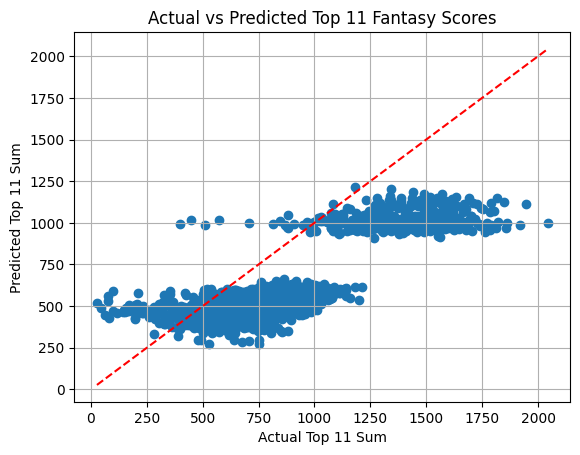

In [61]:
plt.scatter(
    eval_df['sum_top11_actual'],
    eval_df['sum_top11_predict_2'],
)
plt.plot([eval_df['sum_top11_actual'].min(), eval_df['sum_top11_actual'].max()],
         [eval_df['sum_top11_actual'].min(), eval_df['sum_top11_actual'].max()],
         color='red', linestyle='--')

plt.xlabel('Actual Top 11 Sum')
plt.ylabel('Predicted Top 11 Sum')
plt.title('Actual vs Predicted Top 11 Fantasy Scores')

plt.grid()
plt.show()

**Validation with SHAP values**

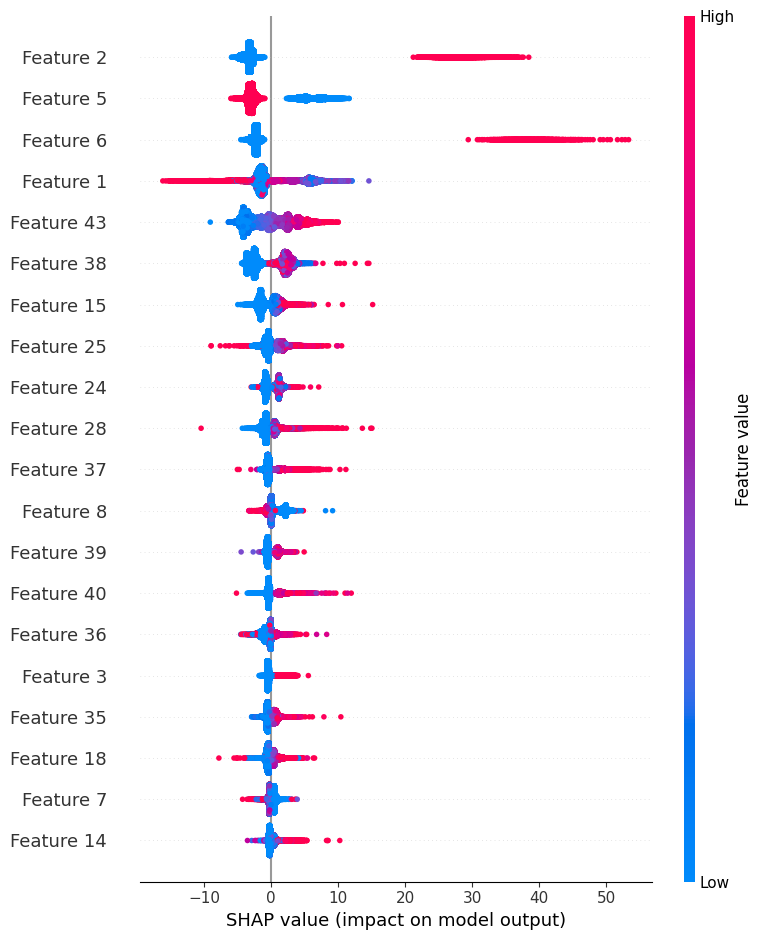

In [48]:
explainer = shap.TreeExplainer(xg2)
extent2= explainer.shap_values(X_test_sel)
shap.summary_plot(extent2, X_test_sel) # Summary Plot

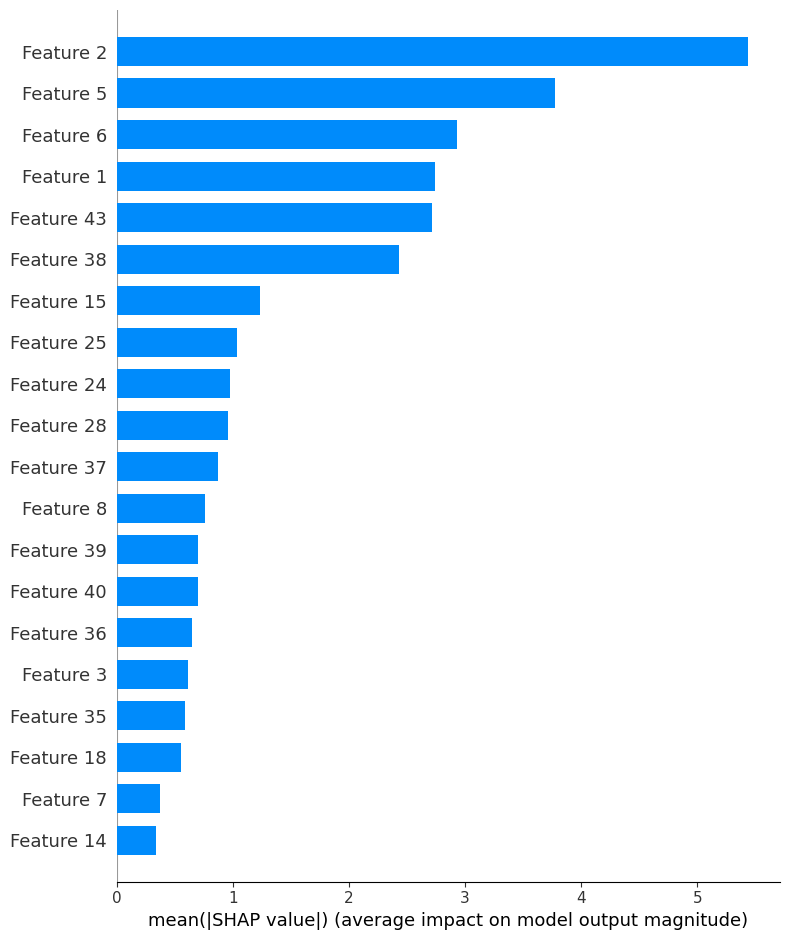

In [49]:
shap.summary_plot(extent2,X_test_sel,plot_type='bar') # Mean absolute SHAP values plot

### **Principal Component Analysis (PCA)**

In [50]:
pca = PCA(n_components=0.8)
X_train_transformed = pca.fit_transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)
print("Number of components:", pca.n_components_)

Number of components: 14


In [51]:
xg3 = XGBRegressor(n_estimators=500, learning_rate=0.04, max_depth  = 5,random_state = 42)
xg3.fit(X_train_transformed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [52]:
predict_fst_3 = xg3.predict(X_test_transformed)
print("RMSE :",mean_squared_error(y_test, predict_fst_3))
print("R2 Score:", r2_score(y_test, predict_fst_3))

RMSE : 1427.5574951171875
R2 Score: 0.1663535237312317


**Performance Analysis**

In [53]:
df_test['predict_fst_3'] = predict_fst_3
df_test

,player_id,match_id,start_date,order_seen,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,...,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,all_rounder_1,all_rounder_5,all_rounder_10,predicted_fst,predicted_fst_2,predict_fst_3
333492,6686,1355634,2023-08-21,0,8,0,0,0,1,0,...,0.000000,120.000000,109.187488,121.870861,15.12,19.143310,19.371102,48.403511,48.071754,45.889061
333493,6713,1355634,2023-08-21,2,9,0,0,0,1,0,...,108.164526,0.000000,0.000000,0.000000,19.44,11.277770,9.976343,40.682480,40.435200,38.060501
333494,11401,1393311,2023-08-21,4,85,0,0,0,1,0,...,68.569397,0.000000,0.000000,0.000000,10.08,18.842858,20.188834,35.020252,34.706684,37.162910
333495,391,1393311,2023-08-21,0,42,0,0,0,1,0,...,0.000000,137.500000,114.287215,0.000000,18.72,13.866873,12.194887,40.423618,40.820694,44.242805
333496,7481,1355634,2023-08-21,1,23,0,0,0,1,0,...,120.895537,0.000000,0.000000,0.000000,5.76,14.034379,23.076988,46.790001,46.265095,42.517593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,42,0,0,1,0,0,...,61.002581,0.000000,0.000000,0.000000,10.80,11.065393,12.664247,39.242279,39.183010,35.494671
416708,7111,1462374,2025-05-20,7,96,0,0,1,0,0,...,0.000000,50.000000,64.365373,72.467429,16.56,27.788399,26.730006,56.343697,56.843231,55.687042
416709,10032,1462374,2025-05-20,8,13,0,0,1,0,0,...,0.000000,62.903226,83.450138,89.922170,15.84,18.496945,16.810381,54.233967,54.179291,55.972691
416710,10220,1473500,2025-05-20,2,16,0,0,0,1,0,...,69.593201,0.000000,0.000000,0.000000,0.00,9.602657,15.384954,43.072468,42.991840,37.447063


In [54]:
eval_df = (

    df_test.groupby('match_id').apply(

        lambda x: pd.Series({

            'sum_top11_actual' : x['fantasy_score_total'].nlargest(11).sum(),
            'sum_top11_predict_1' : x['predicted_fst'].nlargest(11).sum(),
            'sum_top11_predict_2' : x['predicted_fst_2'].nlargest(11).sum(),
            'sum_top11_predict_3' : x['predict_fst_3'].nlargest(11).sum(),

        })

    ).reset_index()

)
eval_df

,match_id,sum_top11_actual,sum_top11_predict_1,sum_top11_predict_2,sum_top11_predict_3
0,1336048,643.0,504.047089,502.769012,484.486023
1,1336049,745.0,479.846832,481.374420,467.768433
2,1336050,772.0,478.077698,477.426788,468.655457
3,1336051,697.0,464.495087,464.106598,457.638580
4,1336052,891.0,575.985168,572.133179,568.065674
...,...,...,...,...,...
3755,1484052,762.0,465.103394,463.999695,466.974243
3756,1485778,649.0,444.534943,444.463989,440.504944
3757,1486225,846.0,437.153320,438.276733,410.486633
3758,1486227,688.0,473.583405,478.759216,453.029755


In [55]:
eval_df['abs_%_error_3'] = (
    (eval_df['sum_top11_predict_3'] - eval_df['sum_top11_actual']).abs() /
    eval_df['sum_top11_actual']
) * 100
eval_df['_%_error_3'] = (
    (eval_df['sum_top11_predict_3'] - eval_df['sum_top11_actual']) /
    eval_df['sum_top11_actual']
) * 100
mean_abs_percentage_error = eval_df['abs_%_error_3'].mean()
mean_percentage_error = eval_df['_%_error_3'].mean()
print(f"Mean Absolute % Error: {mean_abs_percentage_error:.2f}")
print(f"Mean % Error: {mean_percentage_error:.2f}")

Mean Absolute % Error: 33.10
Mean % Error: -26.23


In [56]:
eval_df

,match_id,sum_top11_actual,sum_top11_predict_1,sum_top11_predict_2,sum_top11_predict_3,abs_%_error_3,_%_error_3
0,1336048,643.0,504.047089,502.769012,484.486023,24.652251,-24.652251
1,1336049,745.0,479.846832,481.374420,467.768433,37.212291,-37.212291
2,1336050,772.0,478.077698,477.426788,468.655457,39.293335,-39.293335
3,1336051,697.0,464.495087,464.106598,457.638580,34.341667,-34.341667
4,1336052,891.0,575.985168,572.133179,568.065674,36.244032,-36.244032
...,...,...,...,...,...,...,...
3755,1484052,762.0,465.103394,463.999695,466.974243,38.717291,-38.717291
3756,1485778,649.0,444.534943,444.463989,440.504944,32.125586,-32.125586
3757,1486225,846.0,437.153320,438.276733,410.486633,51.479121,-51.479121
3758,1486227,688.0,473.583405,478.759216,453.029755,34.152652,-34.152652


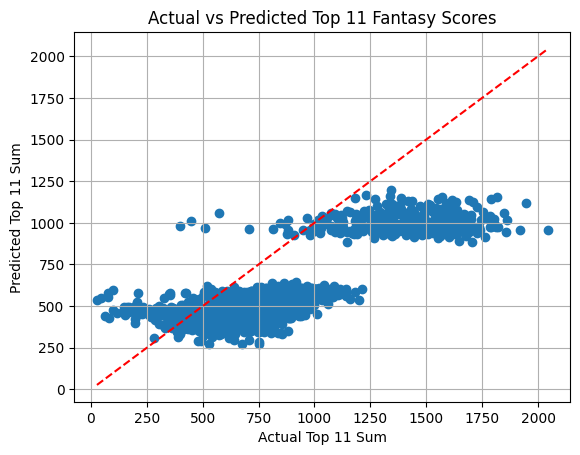

In [60]:
plt.scatter(
    eval_df['sum_top11_actual'],
    eval_df['sum_top11_predict_3'],
)
plt.plot([eval_df['sum_top11_actual'].min(), eval_df['sum_top11_actual'].max()],
         [eval_df['sum_top11_actual'].min(), eval_df['sum_top11_actual'].max()],
         color='red', linestyle='--')

plt.xlabel('Actual Top 11 Sum')
plt.ylabel('Predicted Top 11 Sum')
plt.title('Actual vs Predicted Top 11 Fantasy Scores')

plt.grid()
plt.show()

**Validation with SHAP values**

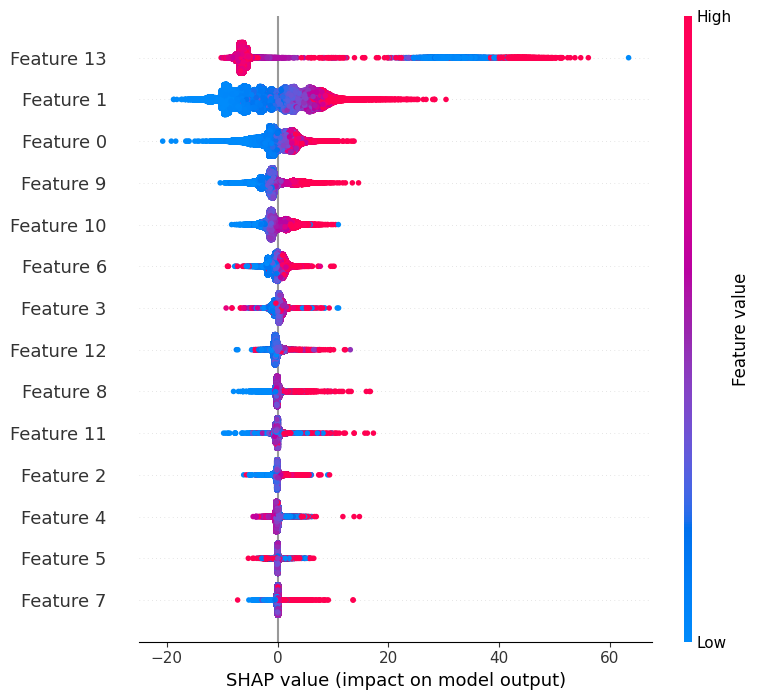

In [58]:
explainer = shap.TreeExplainer(xg3) #Summary Plot
extent3= explainer.shap_values(X_test_transformed)
shap.summary_plot(extent3, X_test_transformed)

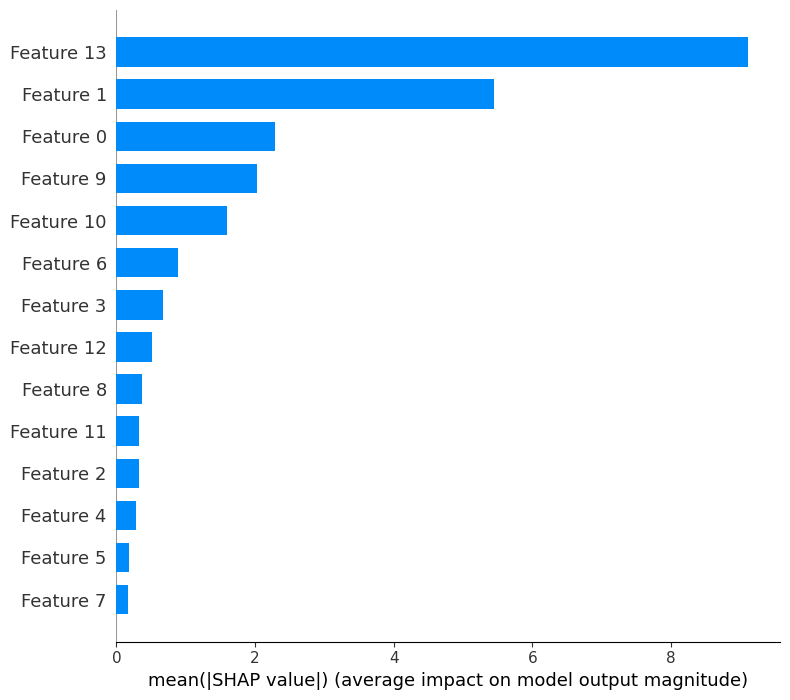

In [59]:
shap.summary_plot(extent3,X_test_transformed,plot_type='bar') # Mean absolute SHAP values plot